# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>
---

## Table of Contents


---

# 1. Introduction <a class="anchor" id="introduction"></a>

## 1.1 Requirements <a class="anchor" id="requirements"></a>

# 2. Implementation <a class="anchor" id="implementation"></a>

## Import libraries <a class="anchor" id="import_libraries"></a>

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
from datetime import datetime
import datetime as dt
from collections import Counter
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings("ignore")

In [140]:
# pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('../data/processed_comic.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Time from release (months)
0,Berserk,9.47,331288,1,1,665300,122841,4.0,23.0,Publishing,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Miura Kentarou Studio Gaga'],233,15,10,1989-08-25,411
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,256146,42864,24.0,96.0,Finished,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Araki Hirohiko'],120,7,1,2004-01-19,87
2,Vagabond,9.24,136403,3,15,364891,40158,37.0,327.0,On Hiatus,"['Action', 'Adventure', 'Award Winning']",['Inoue Takehiko Yoshikawa Eiji'],88,8,1,1998-09-03,201
3,One Piece,9.22,366668,4,3,599278,114531,4.0,23.0,Publishing,"['Action', 'Adventure', 'Fantasy']",['Oda Eiichiro'],173,17,16,1997-07-22,316
4,Monster,9.15,93945,5,29,236355,20501,18.0,162.0,Finished,"['Award Winning', 'Drama', 'Mystery']",['Urasawa Naoki'],64,7,5,1994-12-05,84


In [141]:
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       6128 non-null   object 
 1   Score                       6128 non-null   float64
 2   Vote                        6128 non-null   int64  
 3   Ranked                      6128 non-null   int64  
 4   Popularity                  6128 non-null   int64  
 5   Members                     6128 non-null   int64  
 6   Favorite                    6128 non-null   int64  
 7   Volumes                     6128 non-null   float64
 8   Chapters                    6128 non-null   float64
 9   Status                      6128 non-null   object 
 10  Genres                      6128 non-null   object 
 11  Author                      6128 non-null   object 
 12  Recommended                 6128 non-null   int64  
 13  Mixed Feelings              6128 

## Question 01 <a class="anchor" id="Question 01"></a>

+ Question 01: How does the number of chapters and volumes relate to the number of readers (`members`) and their engagement (`favorites`)?
+ Purpose: Understand the correlation between manga length and reader engagement.
+ Analysis: 
    + Calculate correlation coefficients between pairs (Chapters-Members, Volumes-Members, Chapters-Favorites, Volumes-Favorites)
    + Add trendlines to identify any patterns or correlations.

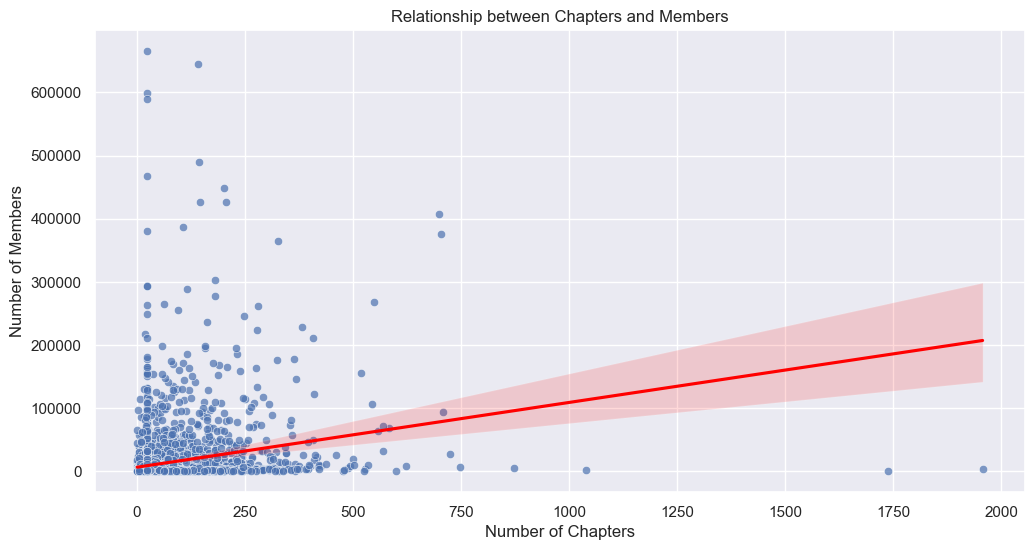

In [142]:
# Convert 'Volumes' and 'Chapters' columns to numeric (removing 'Unknown' values)
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')
manga_df['Members'] = pd.to_numeric(manga_df['Members'], errors='coerce')  # Remove commas and convert to numeric
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'], errors='coerce')  # Remove commas and convert to numeric

# Scatter plot for Chapters vs Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chapters', y='Members', data=manga_df, alpha=0.7)
sns.regplot(x='Chapters', y='Members', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Chapters and Members')
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Members')
plt.show()

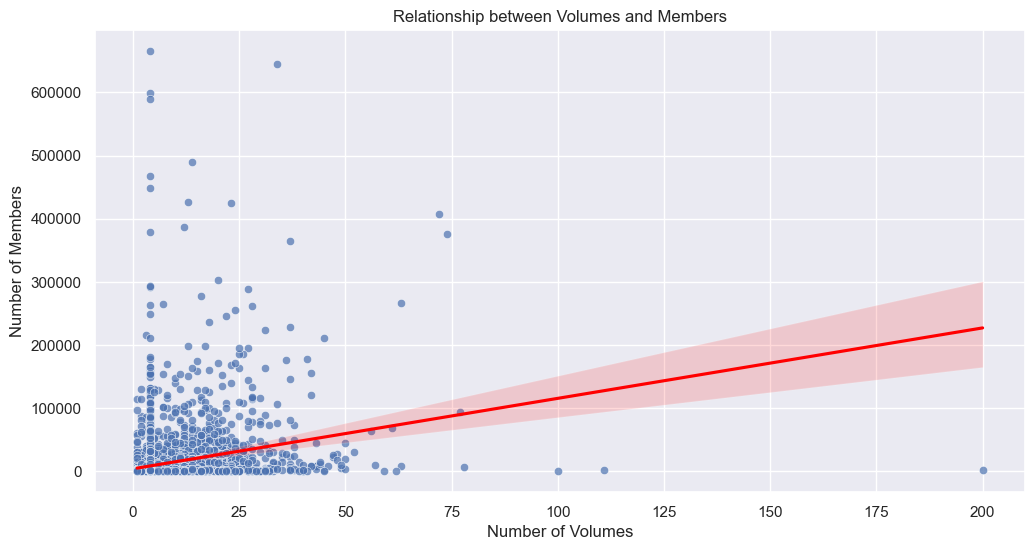

In [143]:
# Scatter plot for Volumes vs Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volumes', y='Members', data=manga_df, alpha=0.7)
sns.regplot(x='Volumes', y='Members', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Volumes and Members')
plt.xlabel('Number of Volumes')
plt.ylabel('Number of Members')
plt.show()

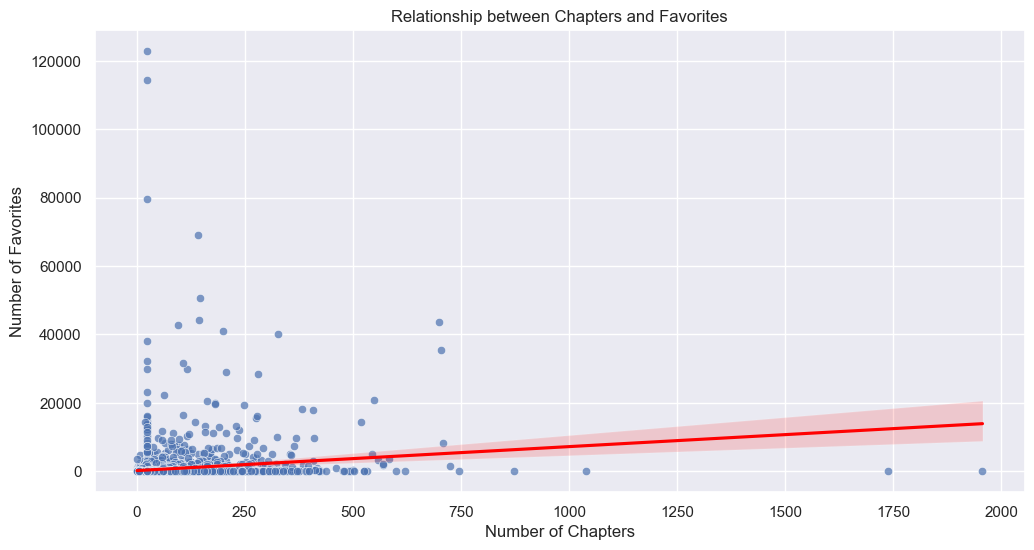

In [144]:
# Scatter plot for Chapters vs Favorites
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chapters', y='Favorite', data=manga_df, alpha=0.7)
sns.regplot(x='Chapters', y='Favorite', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Chapters and Favorites')
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Favorites')
plt.show()

## Question 02 <a class="anchor" id="Question 02"></a>

**Question 02:** Which authors have the highest average scores for their manga on MyAnimeList?
+ Purpose: Identify influential authors based on reader ratings.
+ Analysis:

Group the data by the "Author" column.
Calculate the average score for each author.
Visualize the top authors and their average scores using a bar chart.

## Question 03 <a class="anchor" id="Question 03"></a>

## Question 04 <a class="anchor" id="Question 04"></a>

## Question 05 <a class="anchor" id="Question 05"></a>

## Question 06 <a class="anchor" id="Question 06"></a>

## Question 07 <a class="anchor" id="Question 07"></a>

## Question 08 <a class="anchor" id="Question 08"></a>

+ Question 08: How has the number of manga releases changed over time, and does it follow any patterns?
+ Purpose: 
    - Understand the historical development of manga: Trace the growth of the manga industry from its early stages to the present day.
    - Gain insights into manga release cycles: Reveal patterns in manga releases, valuable for publishers, fans, and professionals for informed planning.
+ Analysis: 
    

In [145]:
manga_df['Release date'] = pd.to_datetime(manga_df['Release date'], errors='coerce')
# group by year and count the number of manga released in each year
manga_df['Year'] = manga_df['Release date'].dt.year.astype('Int64')
manga_df['Month'] = manga_df['Release date'].dt.month.astype('Int64')
manga_df['Decade'] = manga_df['Year'] // 10 * 10
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
manga_df['Season'] = pd.cut(manga_df['Month'], [0, 3, 6, 9, 12], labels=seasons, include_lowest=True)
manga_df[['Release date', 'Year', 'Month', 'Season', 'Decade']].head()

,Release date,Year,Month,Season,Decade
0,1989-08-25,1989,8,Fall,1980
1,2004-01-19,2004,1,Spring,2000
2,1998-09-03,1998,9,Fall,1990
3,1997-07-22,1997,7,Fall,1990
4,1994-12-05,1994,12,Winter,1990


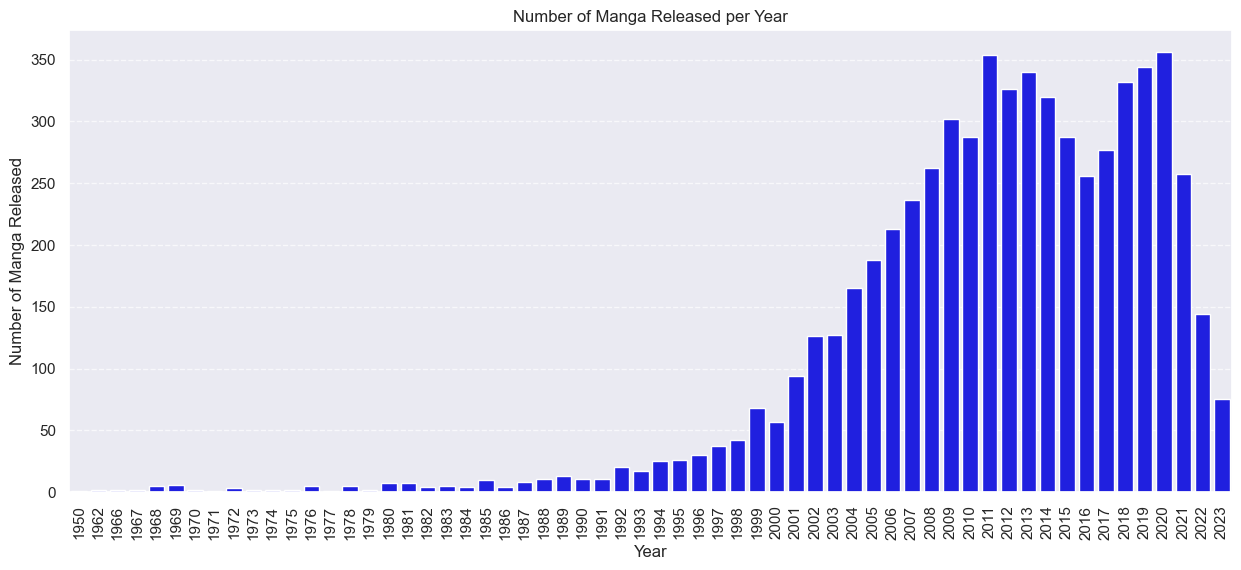

In [146]:

manga_per_year = manga_df.groupby('Year').size().reset_index(name='Count')

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.barplot(x='Year', y='Count', data=manga_per_year, color='blue')
plt.title('Number of Manga Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Manga Released')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

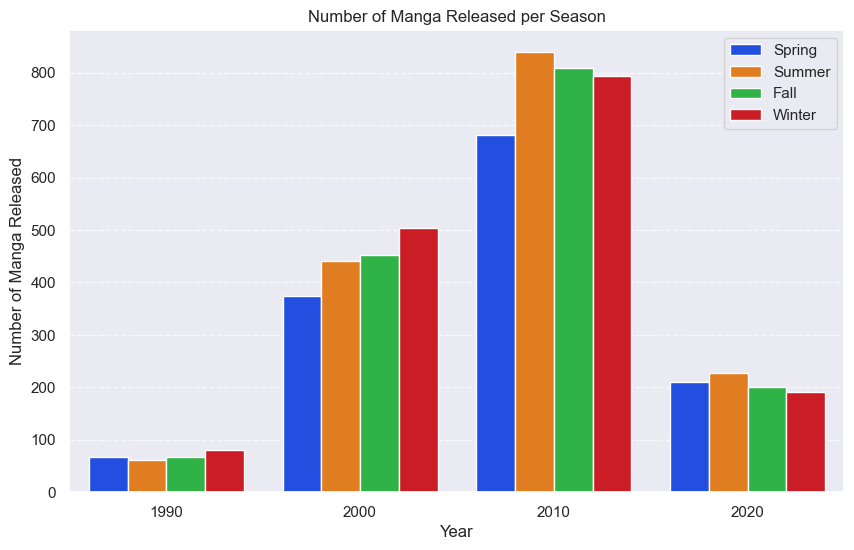

In [147]:
manga_per_season = manga_df[manga_df['Year']>1990].groupby(['Decade', 'Season'],observed=True).size().reset_index(name='Count')

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Count', hue='Season', data=manga_per_season, palette='bright')
plt.title('Number of Manga Released per Season')
plt.xlabel('Year')
plt.ylabel('Number of Manga Released')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

## Question 09 <a class="anchor" id="Question 09"></a>

+ **Question**: How are the `Genres` and preferences of readers?
+ **Purpose**: To determine which genres are popular among readers and to identify the genres for which readers give high voting scores.
+ **Analysis**: 
    + Calculate the top 5 genres with the highest popularity scores
    + Calculate the top 5 genres with the highest voting scores

**The number of times each genre appears in all comics**

In [148]:
manga_copy_df = manga_df.copy()

listGenresColumns = manga_copy_df['Genres'].tolist()
listGenresColumns = [ast.literal_eval(listGenres) for listGenres in listGenresColumns]
listGenresColumns

genreCount = {}

genreCount = Counter(genre for listGenres in listGenresColumns for genre in listGenres)

df_genre_count = pd.DataFrame([genreCount.values()], columns=genreCount.keys())

df_genre_count = df_genre_count.rename(index={0: 'Count'})

df_genre_count

,Action,Adventure,Award Winning,Drama,Fantasy,Horror,Supernatural,Mystery,Sports,Slice of Life,Sci-Fi,Comedy,Romance,Ecchi,Suspense,Boys Love,Girls Love,Gourmet,Avant Garde
Count,1801,889,255,1866,1988,300,1323,556,144,938,597,2482,2518,397,113,285,207,78,4


In [149]:
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)
df_genres_expanded = manga_copy_df.explode('Genres').reset_index()

popular_genre = df_genres_expanded.groupby('Genres')['Popularity'].mean().sort_values(ascending=False).index[0:5]

score_genre = df_genres_expanded.groupby('Genres')['Score'].mean().sort_values(ascending=False).index[0:5]

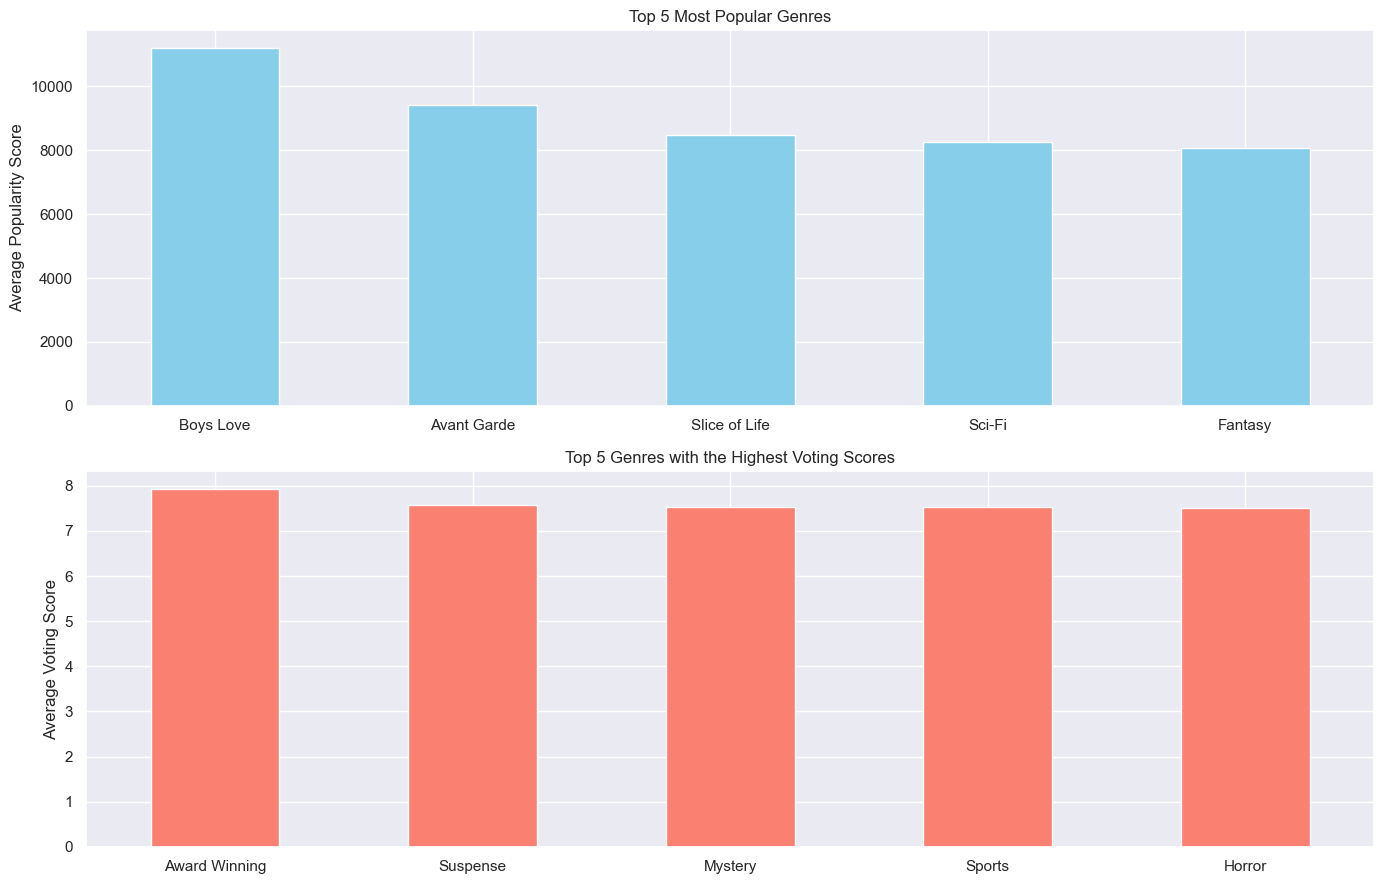

In [150]:
popular_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(popular_genre)]
popular_genre_data = popular_genre_data.groupby('Genres')['Popularity'].mean().sort_values(ascending=False)

score_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(score_genre)]
score_genre_data = score_genre_data.groupby('Genres')['Score'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

popular_genre_data.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 Most Popular Genres')
axes[0].set_ylabel('Average Popularity Score')
axes[0].set_xlabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

score_genre_data.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 5 Genres with the Highest Voting Scores')
axes[1].set_ylabel('Average Voting Score')
axes[1].set_xlabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Question 10 <a class="anchor" id="Question 10"></a>

+ **Question**: The relationship between `Status` and variables such as the number of `Recommended` ratings and `Release date` ?
+ **Purpose**: 
    + Analyzing the relationship between `Status` and the number of `Recommended` ratings can provide information about the interest and positive feedback from the reader community.
    + Examining the relationship between `Status` and the `Release date` can help us better understand how an item develops over time. 
+ **Analysis**: 
    + Draw a box plot between `Status` and `Recommended`
    + Measure the correlation between `Status` and `Release date`

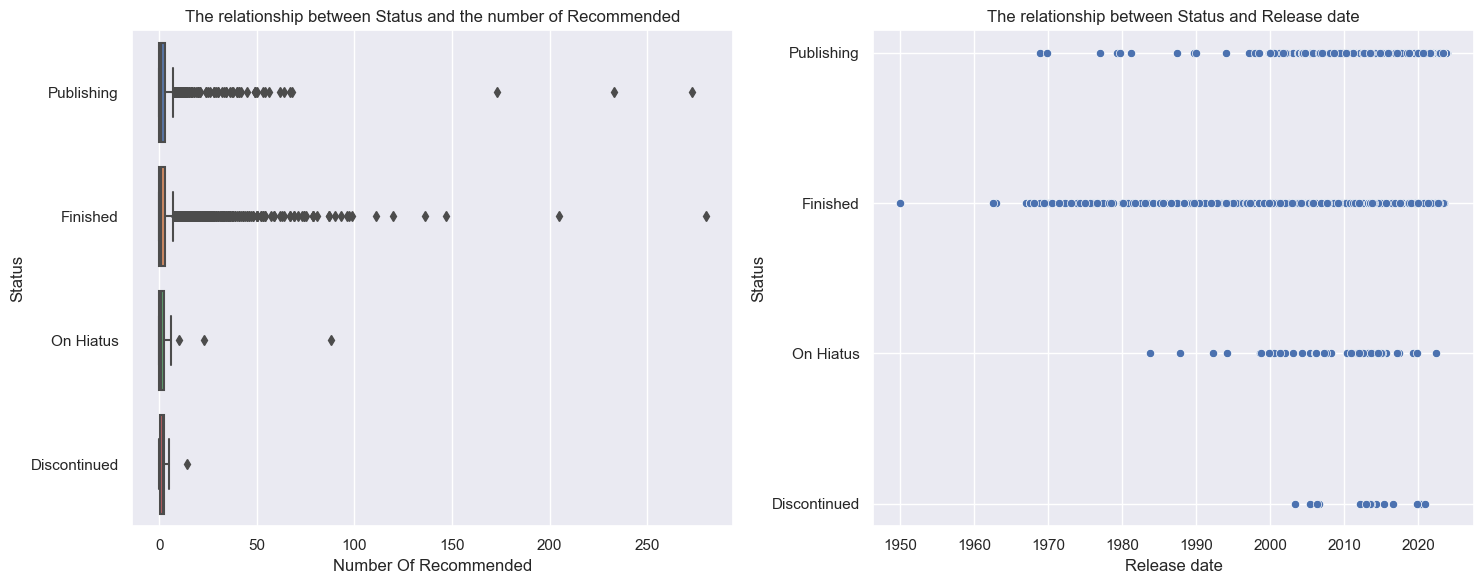

The correlation coefficient between Status and Release date: 0.3758344646893403


In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x='Recommended', y='Status', data=manga_copy_df, ax=axes[0])
axes[0].set_title('The relationship between Status and the number of Recommended')
axes[0].set_xlabel('Number Of Recommended')
axes[0].set_ylabel('Status')

sns.scatterplot(x='Release date', y='Status', data=manga_copy_df, ax=axes[1])
axes[1].set_title('The relationship between Status and Release date')
axes[1].set_xlabel('Release date')
axes[1].set_ylabel('Status')

plt.tight_layout()
plt.show()

correlation_status_time = manga_copy_df['Status'].astype('category').cat.codes.corr(manga_copy_df['Release date'])
print(f'The correlation coefficient between Status and Release date: {correlation_status_time}')